<a href="https://colab.research.google.com/github/SudhakarReddy1602/Neural_Assignments/blob/main/ICP%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sudhakar Reddy Venna
700756157


In [6]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.datasets import mnist # Import the mnist dataset
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Enhanced Autoencoder Model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='LeakyReLU', kernel_regularizer=l2(0.001))(input_img)  # Deeper, L2 regularization
encoded = Dense(64, activation='LeakyReLU', kernel_regularizer=l2(0.001))(encoded)
encoding_dim = 32  # Define the size of the bottleneck layer
encoded = Dense(encoding_dim, activation='LeakyReLU')(encoded)   # Bottleneck layer

decoded = Dense(64, activation='LeakyReLU')(encoded)
decoded = Dense(128, activation='LeakyReLU')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
optimizer = Adam(learning_rate=0.001)  # Start with a higher learning rate
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

autoencoder.fit(x_train, x_train,
                epochs=50,  # Increase epochs for potential better results
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[early_stopping])

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/50
235/235 [==============================] - 5s 6ms/step - loss: 0.3263 - val_loss: 0.2153
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1953 - val_loss: 0.1769
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1708 - val_loss: 0.1631
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1608 - val_loss: 0.1552
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1534 - val_loss: 0.1481
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1473 - val_loss: 0.1437
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1438 - val_loss: 0.1404
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1411 - val_loss: 0.1384
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1387 - val_loss: 0.1366
Epoch 10/50
235/235 [==============

1. Add one more hidden layer to autoencoder

In [7]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Adding an additional hidden layer
hidden_layer_dim = 64
hidden_layer = Dense(hidden_layer_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input, now connected to the hidden layer instead of 'encoded'
decoded = Dense(784, activation='sigmoid')(hidden_layer)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# Load and prepare the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 0.6949 - val_loss: 0.6948
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6940 - val_loss: 0.6939


2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.Also, visualize the same test data before reconstruction using Matplotlib


Epoch 1/15
235/235 [==============================] - 4s 6ms/step - loss: 0.3759 - val_loss: 0.3164 - lr: 0.0010
Epoch 2/15
235/235 [==============================] - 1s 5ms/step - loss: 0.3125 - val_loss: 0.3027 - lr: 0.0010
Epoch 3/15
235/235 [==============================] - 1s 5ms/step - loss: 0.3041 - val_loss: 0.2980 - lr: 0.0010
Epoch 4/15
235/235 [==============================] - 1s 5ms/step - loss: 0.2999 - val_loss: 0.2939 - lr: 0.0010
Epoch 5/15
235/235 [==============================] - 1s 4ms/step - loss: 0.2968 - val_loss: 0.2911 - lr: 0.0010
Epoch 6/15
235/235 [==============================] - 1s 4ms/step - loss: 0.2948 - val_loss: 0.2893 - lr: 0.0010
Epoch 7/15
235/235 [==============================] - 1s 5ms/step - loss: 0.2930 - val_loss: 0.2880 - lr: 0.0010
Epoch 8/15
235/235 [==============================] - 1s 5ms/step - loss: 0.2916 - val_loss: 0.2876 - lr: 0.0010
Epoch 9/15
235/235 [==============================] - 2s 7ms/step - loss: 0.2902 - val_loss: 0.2

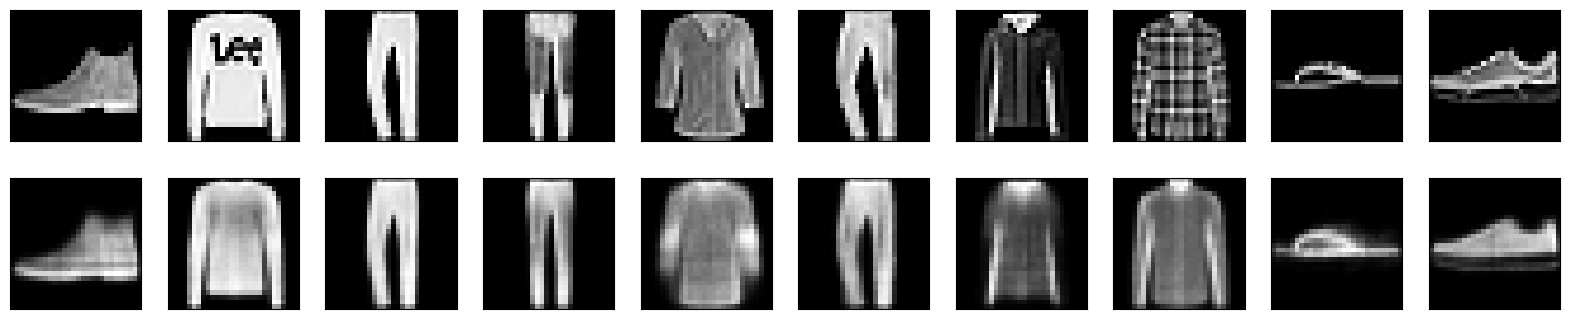

In [8]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# ... (Data loading and preparation remains the same)

# Enhanced model architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)  # More units
encoded = Dropout(0.2)(encoded)                      # Dropout for regularization
encoded = Dense(64, activation='relu')(encoded)
hidden_layer = Dense(128, activation='relu')(encoded)  # Deeper architecture
decoded = Dense(784, activation='sigmoid')(hidden_layer)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Callbacks for improved training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Training with callbacks
autoencoder.fit(x_train, x_train,
                epochs=15,                  # Increased epochs for deeper model
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[early_stopping, lr_scheduler])

# Predict on the test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed data
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

3. Repeat the question 2 on the denoisening autoencoder

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.4178 - val_loss: 0.3455 - lr: 0.0010
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3429 - val_loss: 0.3300 - lr: 0.0010
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3326 - val_loss: 0.3235 - lr: 0.0010
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3274 - val_loss: 0.3194 - lr: 0.0010
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3240 - val_loss: 0.3163 - lr: 0.0010
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3217 - val_loss: 0.3141 - lr: 0.0010
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3198 - val_loss: 0.3128 - lr: 0.0010
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3183 - val_loss: 0.3110 - lr: 0.0010
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3172 - val_loss: 0.3

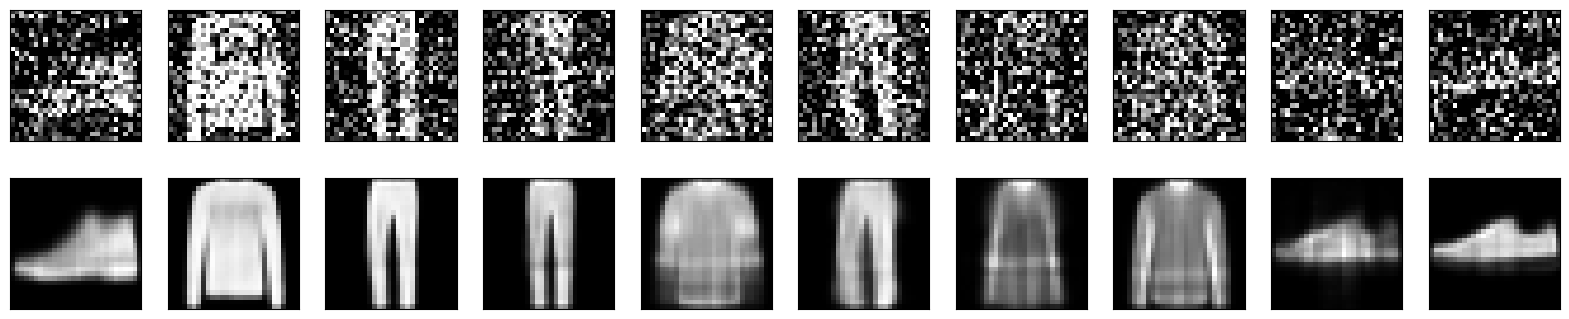

In [9]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


# Model architecture with regularization
encoding_dim = 64  # Increased encoding dimension for better representation
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dropout(0.2)(encoded)  # Add dropout for regularization
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Noise introduction
noise_factor = 0.5 # You can adjust this for more/less noise
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the model
autoencoder.fit(x_train_noisy, x_train,  # Train on noisy input, target is clean
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[early_stopping, lr_scheduler])

# Predict on the noisy test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize the noisy input and the reconstructed data
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy input
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

4. plot loss and accuracy using the history object

Epoch 1/10
235/235 [==============================] - 2s 4ms/step - loss: 0.6167 - accuracy: 0.7939 - val_loss: 0.4955 - val_accuracy: 0.8260
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.8518 - val_loss: 0.4262 - val_accuracy: 0.8517
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3849 - accuracy: 0.8643 - val_loss: 0.4099 - val_accuracy: 0.8524
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3583 - accuracy: 0.8731 - val_loss: 0.3928 - val_accuracy: 0.8630
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3432 - accuracy: 0.8779 - val_loss: 0.3861 - val_accuracy: 0.8625
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3275 - accuracy: 0.8820 - val_loss: 0.3742 - val_accuracy: 0.8681
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3125 - accuracy: 0.8873 - val_loss: 0.3564 - val_accuracy: 0.8740
Epoch 

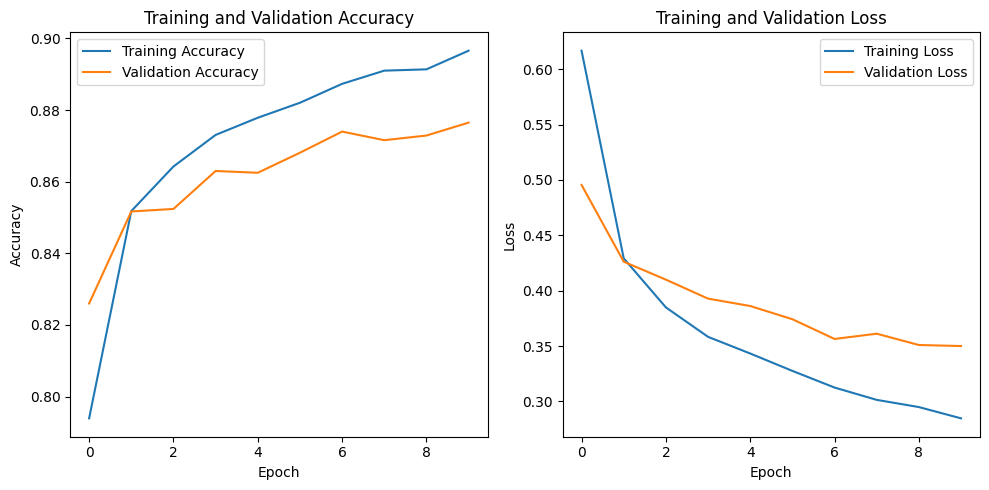

In [10]:

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# Load and prepare the Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Model architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(10, activation='softmax')(encoded)  # Classification layer

model = Model(input_img, decoded)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, y_test))
# Plotting the training and validation loss
plt.figure(figsize=(10, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()